In [1]:
import math

def normdensity(x,mu,sigma):
    weight = 1.0 /(sigma * math.sqrt(2.0*math.pi))
    argument = ((x - mu)**2)/(2.0*sigma**2)
    normdensity = weight*math.exp(-1.0*argument)
    return normdensity

def normdist(x,mu,sigma):
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist

In [2]:
# Standard Normal

mu = 0
sigma = 1

x = []
ypdf = []
ycdf = []

xlow = -10
xhigh = 10
howMany = 100
xstep = (xhigh - xlow)/howMany

for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdensity(xlow + i*xstep,mu,sigma)
    ypdf.append(yvalue)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue)  

#x
#ypdf
#ycdf

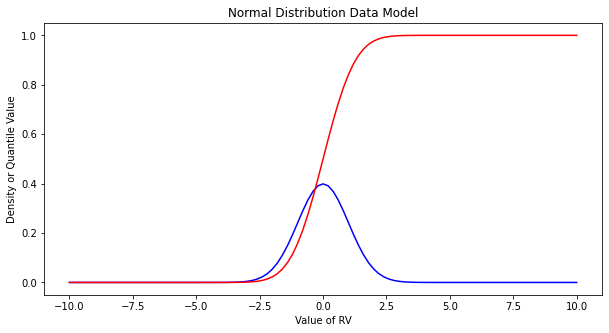

In [3]:
import matplotlib.pyplot # the python plotting library
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.plot(x, ypdf, color ='blue') 
matplotlib.pyplot.plot(x, ycdf, color ='red') 
matplotlib.pyplot.xlabel("Value of RV") 
matplotlib.pyplot.ylabel("Density or Quantile Value") 
matplotlib.pyplot.title("Normal Distribution Data Model") 
matplotlib.pyplot.show() 

In [4]:
import numpy

population = []
for i in range(0,101,1):
    population.append(i)
    
sample = numpy.random.choice(population,25)

In [5]:
# lets get some statistics
sample_mean = sample.mean()
sample_variance = sample.std()**2

In [6]:
# sort the sample in place!
sample.sort()
# built a relative frequency approximation to probability, assume each pick is equally likely
weibull_pp = []
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))

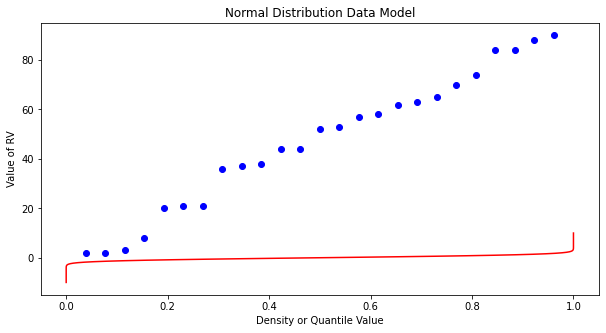

In [7]:
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.scatter(weibull_pp, sample, color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.ylabel("Value of RV") 
matplotlib.pyplot.xlabel("Density or Quantile Value") 
matplotlib.pyplot.title("Normal Distribution Data Model") 
matplotlib.pyplot.show() 

In [8]:
# Fitted Model

mu = sample_mean
sigma = math.sqrt(sample_variance)

x = []
ycdf = []

xlow = 0
xhigh = 100
howMany = 100
xstep = (xhigh - xlow)/howMany

for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 

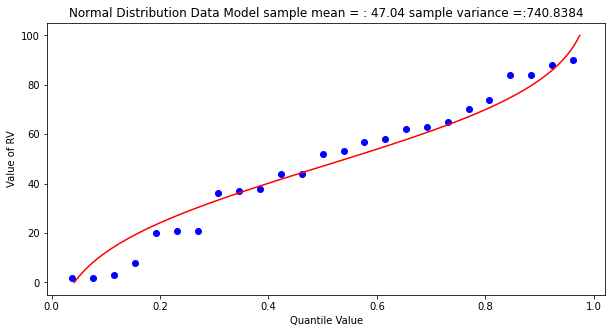

In [9]:
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.scatter(weibull_pp, sample,  color ='blue') 
matplotlib.pyplot.plot(ycdf, x,  color ='red') 
matplotlib.pyplot.ylabel("Value of RV") 
matplotlib.pyplot.xlabel("Quantile Value") 
mytitle = "Normal Distribution Data Model sample mean = : " + str(sample_mean)+ " sample variance =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

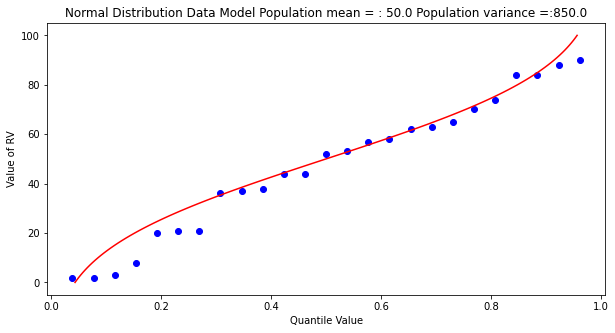

In [10]:
popmean = numpy.array(population).mean()
popvar = numpy.array(population).std()**2
# Fitted Model

mu = popmean
sigma = math.sqrt(popvar)

x = []
ycdf = []

xlow = 0
xhigh = 100
howMany = 100
xstep = (xhigh - xlow)/howMany

for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 

    
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (10,5)) # generate a object from the figure class, set aspect ratio

# Built the plot
matplotlib.pyplot.scatter(weibull_pp, sample, color ='blue') 
matplotlib.pyplot.plot(ycdf, x,  color ='red') 
matplotlib.pyplot.ylabel("Value of RV") 
matplotlib.pyplot.xlabel("Quantile Value") 
mytitle = "Normal Distribution Data Model Population mean = : " + str(popmean)+ " Population variance =:" + str(popvar)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

In [11]:
import pandas
beargrass = pandas.read_csv('beargrass.txt')  #Reading a .csv file
beargrass.head()

,Year,Peak
0,1945,1810
1,1946,791
2,1947,839
3,1948,1750
4,1949,898


<AxesSubplot:>

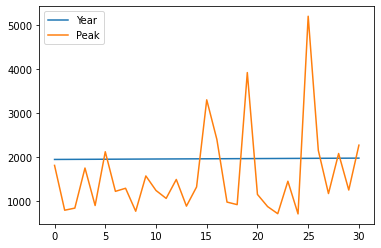

In [12]:
beargrass.plot()

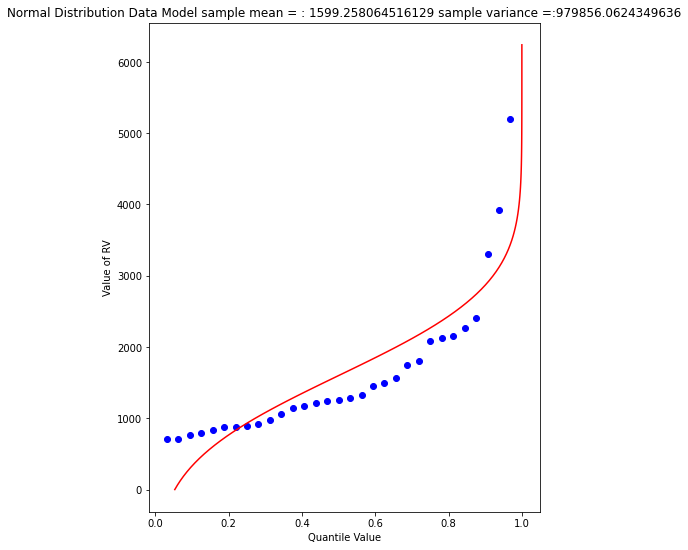

In [13]:
sample = beargrass['Peak'].tolist() # put the peaks into a list
sample_mean = numpy.array(sample).mean()
sample_variance = numpy.array(sample).std()**2
sample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(sample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Normal Distribution Data Model sample mean = : " + str(sample_mean)+ " sample variance =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

In [14]:
beargrass['Peak'].describe()

count      31.000000
mean     1599.258065
std      1006.239500
min       707.000000
25%       908.000000
50%      1250.000000
75%      1945.000000
max      5200.000000
Name: Peak, dtype: float64

In [15]:
myguess = 6000
print(mu,sigma)
print(normdist(myguess,mu,sigma))

1599.258064516129 989.8767915427474
0.9999956206542673


In [16]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    mu = 1599.258064516129
    sigma = 989.8767915427474
    quantile = 0.99999
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))


5820.974479887303


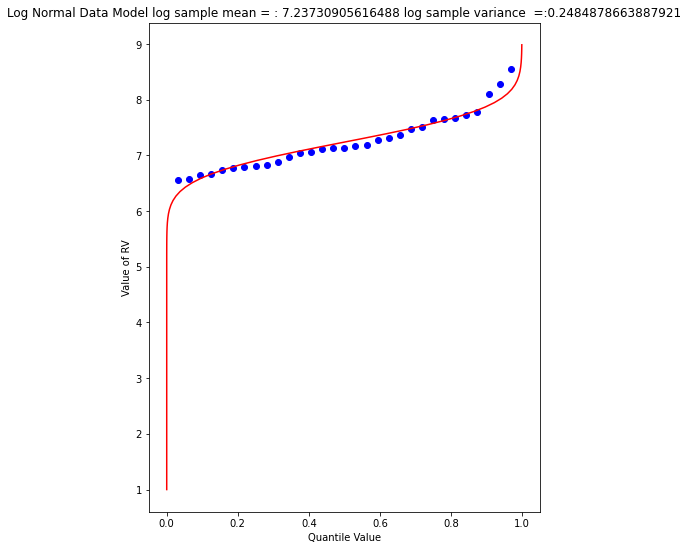

In [17]:
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))

logsample = beargrass['Peak'].apply(loggit).tolist() # put the peaks into a list
sample_mean = numpy.array(logsample).mean()
sample_variance = numpy.array(logsample).std()**2
logsample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model in Log Space
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 1; xhigh = 1.05*max(logsample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, logsample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Normal Data Model log sample mean = : " + str(sample_mean)+ " log sample variance  =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

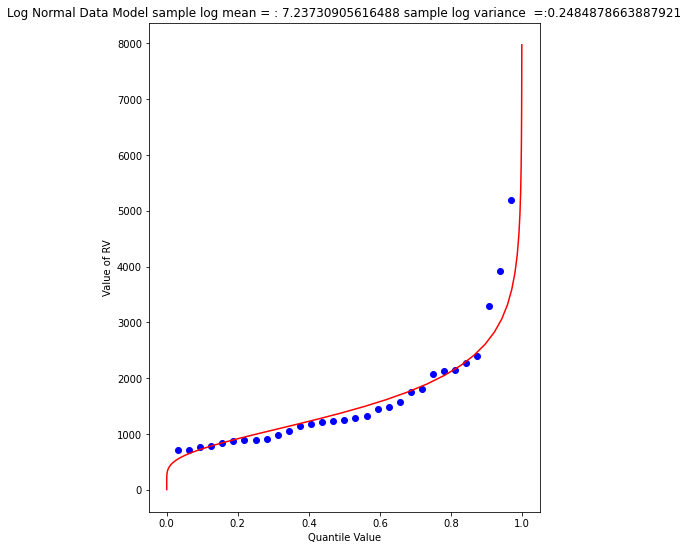

In [18]:
def antiloggit(x):  # A prototype function to log transform x
    return(math.exp(x))

sample = beargrass['Peak'].tolist() # pull original list
sample.sort() # sort in place
################
mu = sample_mean # Fitted Model in Log Space
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 1; xhigh = 1.05*max(logsample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(antiloggit(xlow + i*xstep))
    yvalue = normdist(xlow + i*xstep,mu,sigma)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,9)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Normal Data Model sample log mean = : " + str((sample_mean))+ " sample log variance  =:" + str((sample_variance))
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

In [19]:
myguess = 4440
print(mu,sigma)
print(normdist(loggit(myguess),mu,sigma)) # mu, sigma already in log space - convert myguess

7.23730905616488 0.4984855728993489
0.9900772507418302


In [20]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    mu = 7.23730905616488
    sigma = 0.4984855728993489
    quantile = 0.99
    argument = (loggit(x) - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))

4433.567789173262


In [21]:
def ev1dist(x,alpha,beta):
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist

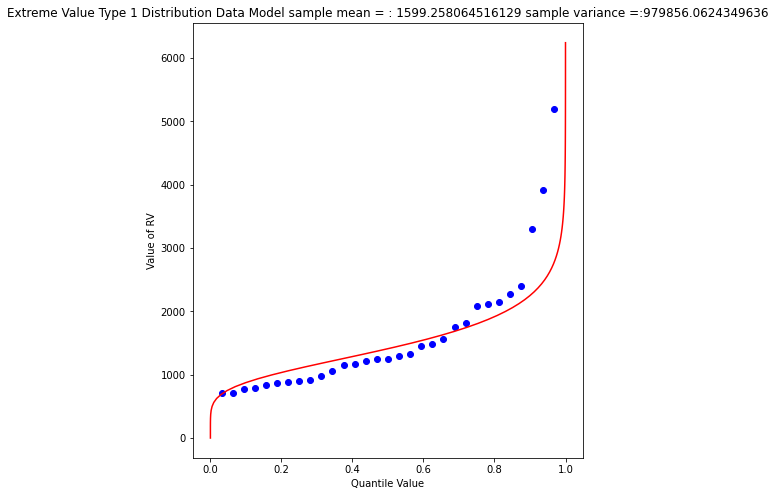

In [22]:
sample = beargrass['Peak'].tolist() # put the peaks into a list
sample_mean = numpy.array(sample).mean()
sample_variance = numpy.array(sample).std()**2
alpha_mom = sample_mean*math.sqrt(6)/math.pi
beta_mom = math.sqrt(sample_variance)*0.45
sample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(sample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = ev1dist(xlow + i*xstep,alpha_mom,beta_mom)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
myfigure = matplotlib.pyplot.figure(figsize = (7,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(weibull_pp, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Extreme Value Type 1 Distribution Data Model sample mean = : " + str(sample_mean)+ " sample variance =:" + str(sample_variance)
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

In [23]:
myguess = 3300
print(alpha_mom,beta_mom)
print(ev1dist(myguess,alpha_mom,beta_mom)) # 

1246.9363972503857 445.4445561942363
0.990087892543188


In [24]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    alpha = 1246.9363972503857
    beta = 445.4445561942363
    quantile = 0.99
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist - quantile

print(newton(f, myguess))

3296.0478279991366


In [25]:
import scipy.stats # import scipy stats package
import math        # import math package
import numpy       # import numpy package
# log and antilog
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))
def antiloggit(x):  # A prototype function to log transform x
    return(math.exp(x))
def weibull_pp(sample): # plotting position function
# returns a list of plotting positions; sample must be a numeric list
    weibull_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        weibull_pp.append((i+1)/(len(sample)+1))
    return weibull_pp


In [26]:
def gammacdf(x,tau,alpha,beta): # Gamma Cumulative Density function - with three parameter to one parameter convert
    xhat = x-tau
    lamda = 1.0/beta
    gammacdf = scipy.stats.gamma.cdf(lamda*xhat, alpha)
    return gammacdf

In [27]:
#sample = beargrass['Peak'].tolist() # put the peaks into a list
sample = beargrass['Peak'].apply(loggit).tolist() # put the log peaks into a list
sample_mean  = numpy.array(sample).mean()
sample_stdev = numpy.array(sample).std()
sample_skew  = 3.0 # scipy.stats.skew(sample)
sample_alpha = 4.0/(sample_skew**2)
sample_beta  = numpy.sign(sample_skew)*math.sqrt(sample_stdev**2/sample_alpha)
sample_tau   = sample_mean - sample_alpha*sample_beta

In [28]:
plotting = weibull_pp(sample)

In [29]:
x = []; ycdf = []
xlow = (0.9*min(sample)); xhigh = (1.1*max(sample)) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = gammacdf(xlow + i*xstep,sample_tau,sample_alpha,sample_beta)
    ycdf.append(yvalue) 

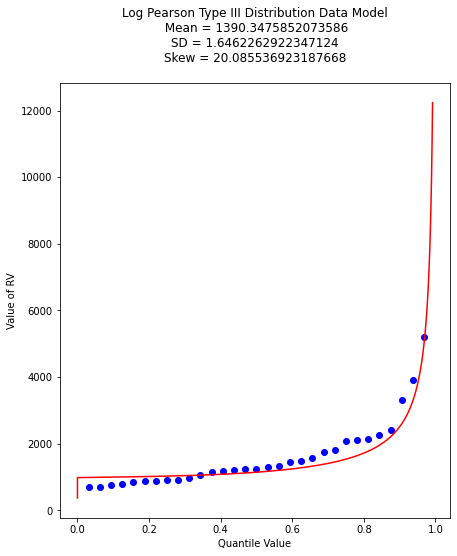

In [30]:
# reverse transform the peaks, and the data model peaks
for i in range(len(sample)):
    sample[i] = antiloggit(sample[i])
for i in range(len(x)):
    x[i] = antiloggit(x[i])
myfigure = matplotlib.pyplot.figure(figsize = (7,8)) # generate a object from the figure class, set aspect ratio
matplotlib.pyplot.scatter(plotting, sample ,color ='blue') 
matplotlib.pyplot.plot(ycdf, x, color ='red') 
matplotlib.pyplot.xlabel("Quantile Value") 
matplotlib.pyplot.ylabel("Value of RV") 
mytitle = "Log Pearson Type III Distribution Data Model\n "
mytitle += "Mean = " + str(antiloggit(sample_mean)) + "\n"
mytitle += "SD = " + str(antiloggit(sample_stdev)) + "\n"
mytitle += "Skew = " + str(antiloggit(sample_skew)) + "\n"
matplotlib.pyplot.title(mytitle) 
matplotlib.pyplot.show()

In [31]:
print(sample_tau)
print(sample_alpha)
print(sample_beta)

6.904985340898647
0.4444444444444444
0.7477283593490234


In [32]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    sample_tau = 5.976005311346212
    sample_alpha = 6.402272915026134
    sample_beta = 0.1970087438569494
    quantile = 0.9900
    argument = loggit(x)
    gammavalue = gammacdf(argument,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

myguess =  5000
print(newton(f, myguess))

5856.10913158364


In [33]:
round(gammacdf(loggit(5856.109),sample_tau,sample_alpha,sample_beta),4)

0.9753

In [34]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    sample_tau = 5.976005311346212
    sample_alpha = 6.402272915026134
    sample_beta = 0.1970087438569494
    quantile = 0.50
    argument = loggit(x)
    gammavalue = gammacdf(argument,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

myguess =  1000
print(newton(f, myguess))

1302.814639184079
